In [1]:
import pandas as pd
import numpy as np

In [2]:
# prompt: give code to connect with google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load dataset
amazon_food_data = pd.read_csv('/content/drive/My Drive/Amazon-Food-Reviews.csv')

In [5]:
amazon_food_data.head()

,Score,Summary,Text
0,1,"Great product, terrible price",Do not buy at this price! There are a dozen r...
1,1,Not impressed at ALL,"This product was not HORRIBLE, but I feel chea..."
2,1,Don't order from Amazon!,My dog loves this food and when I saw it here ...
3,1,"Maybe good cracker, but package was damaged","This may be a good cracker, but I had to retur..."
4,1,"Great rice, price is such a rip-off","It is a great product, however, who would spen..."


In [7]:
# Convert Score to Positive (4, 5) and Negative (1, 2, 3)
amazon_food_data['Sentiment'] = amazon_food_data['Score'].apply(lambda x: 'Positive' if x > 3 else 'Negative')

# Display the first few rows to verify the changes
print(amazon_food_data.head())

   Score                                      Summary  \
0      1                Great product, terrible price   
1      1                         Not impressed at ALL   
2      1                     Don't order from Amazon!   
3      1  Maybe good cracker, but package was damaged   
4      1          Great rice, price is such a rip-off   

                                                Text Sentiment  
0  Do not buy at this price!  There are a dozen r...  Negative  
1  This product was not HORRIBLE, but I feel chea...  Negative  
2  My dog loves this food and when I saw it here ...  Negative  
3  This may be a good cracker, but I had to retur...  Negative  
4  It is a great product, however, who would spen...  Negative  


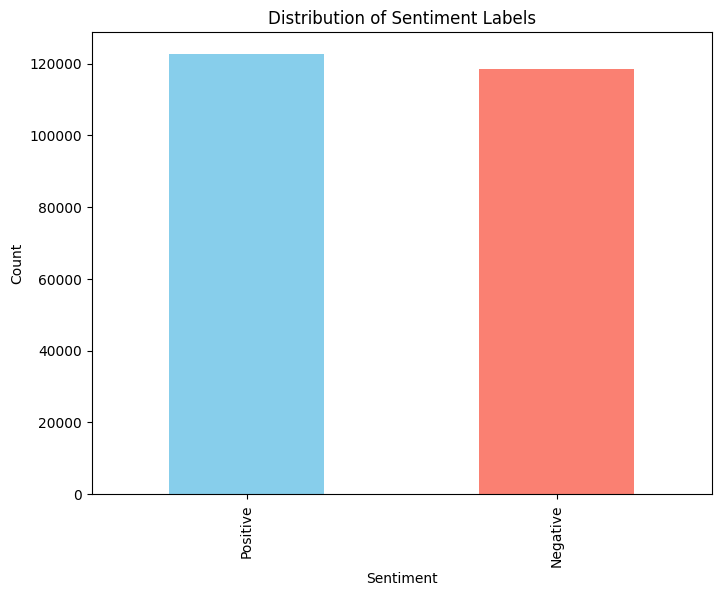

In [8]:
import matplotlib.pyplot as amazon_food_plt
# Plot distribution of Positive and Negative labels
sentiment_counts = amazon_food_data['Sentiment'].value_counts()
amazon_food_plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
amazon_food_plt.title('Distribution of Sentiment Labels')
amazon_food_plt.xlabel('Sentiment')
amazon_food_plt.ylabel('Count')
amazon_food_plt.show()

In [9]:
# Balance the dataset to have 7500 samples for each class
positive_samples = amazon_food_data[amazon_food_data['Sentiment'] == 'Positive'].sample(n=7500, random_state=42)
negative_samples = amazon_food_data[amazon_food_data['Sentiment'] == 'Negative'].sample(n=7500, random_state=42)

# Combine balanced data
balanced_data = pd.concat([positive_samples, negative_samples]).reset_index(drop=True)

# Verify the balanced dataset
print(balanced_data['Sentiment'].value_counts())

# Save the balanced dataset to a new CSV (optional)
balanced_data.to_csv('/content/drive/My Drive/Amazon-Food-Reviews-Balanced.csv', index=False)

Sentiment
Positive    7500
Negative    7500
Name: count, dtype: int64


In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove words with 2 or fewer characters
    text = ' '.join([word for word in text.split() if len(word) > 2])
    return text

# Apply the preprocessing function to the Text column
balanced_data['Processed_Text'] = balanced_data['Text'].apply(preprocess_text)

# Display the first few rows to verify
print(balanced_data[['Text', 'Processed_Text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                Text  \
0  I highly recommend this tasty product to help ...   
1  I'm not here to bs anyone.  This Tropical Frui...   
2  Taste like sweet butter corn that melts in my ...   
3  The Terra Sweet Potato chips are a delicious a...   
4  Finally some great coffee, thank goodness Star...   

                                      Processed_Text  
0  highly recommend this tasty product help lower...  
1  not here anyone this tropical fruit salad from...  
2  taste like sweet butter corn that melts mouth ...  
3  the terra sweet potato chips are delicious all...  
4  finally some great coffee thank goodness starb...  


In [11]:
balanced_data[['Text', 'Processed_Text']].head()

,Text,Processed_Text
0,I highly recommend this tasty product to help ...,highly recommend this tasty product help lower...
1,I'm not here to bs anyone. This Tropical Frui...,not here anyone this tropical fruit salad from...
2,Taste like sweet butter corn that melts in my ...,taste like sweet butter corn that melts mouth ...
3,The Terra Sweet Potato chips are a delicious a...,the terra sweet potato chips are delicious all...
4,"Finally some great coffee, thank goodness Star...",finally some great coffee thank goodness starb...


In [12]:
# Initialize the Porter stemmer
stemmer = PorterStemmer()

# Define function to remove stop words and apply stemming
def remove_stopwords_and_stem(text):
    # Remove stop words and apply stemming
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Apply the function to the Processed_Text column
balanced_data['Processed_Text'] = balanced_data['Processed_Text'].apply(remove_stopwords_and_stem)

# Display the first few rows to verify
balanced_data[['Text', 'Processed_Text']].head()


,Text,Processed_Text
0,I highly recommend this tasty product to help ...,highli recommend tasti product help lower chol...
1,I'm not here to bs anyone. This Tropical Frui...,anyon tropic fruit salad roland absolut best i...
2,Taste like sweet butter corn that melts in my ...,tast like sweet butter corn melt mouth given n...
3,The Terra Sweet Potato chips are a delicious a...,terra sweet potato chip delici allnatur snackb...
4,"Finally some great coffee, thank goodness Star...",final great coffe thank good starbuck final ga...
